In [1]:
from keras.layers import *
from keras.models import Model

In [2]:
# we are using multiple inputs and at the
# later stage, we are mergin them.
# define two sets of inputs

inputA = Input(shape=(32,))
inputB = Input(shape=(128,))

In [3]:
# the first branch operates on the first input

x = Dense(8, activation="relu")(inputA)
x1 = Dense(4, activation="relu")(x)

In [4]:
# the second branch opreates on the second input

y = Dense(64, activation="relu")(inputB)
y1 = Dense(32, activation="relu")(y)
y2 = Dense(4, activation="relu")(y1)

In [5]:
# combine the output of the two branches

combined = concatenate([x1, y2])

In [6]:
# apply a FC layer and then a regression prediction on the
# combined outputs

z = Dense(2, activation="relu")(combined)
z1 = Dense(1, activation="linear")(z)

In [9]:
# our model will accept the inputs of the two branches and
# then output a single value

model = Model(inputs=[inputA, inputB], outputs=z1)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer (InputLayer)  │ (None, 32)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 64)             │          8,256 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 8)              │            264 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 32)             │          2,080 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 4)              │             36 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 4)              │            132 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 8)              │              0 │ dense_1[0][0],         │
│                           │                        │                │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 2)              │             18 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 1)              │              3 │ dense_5[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 10,789 (42.14 KB)

 Trainable params: 10,789 (42.14 KB)

 Non-trainable params: 0 (0.00 B)

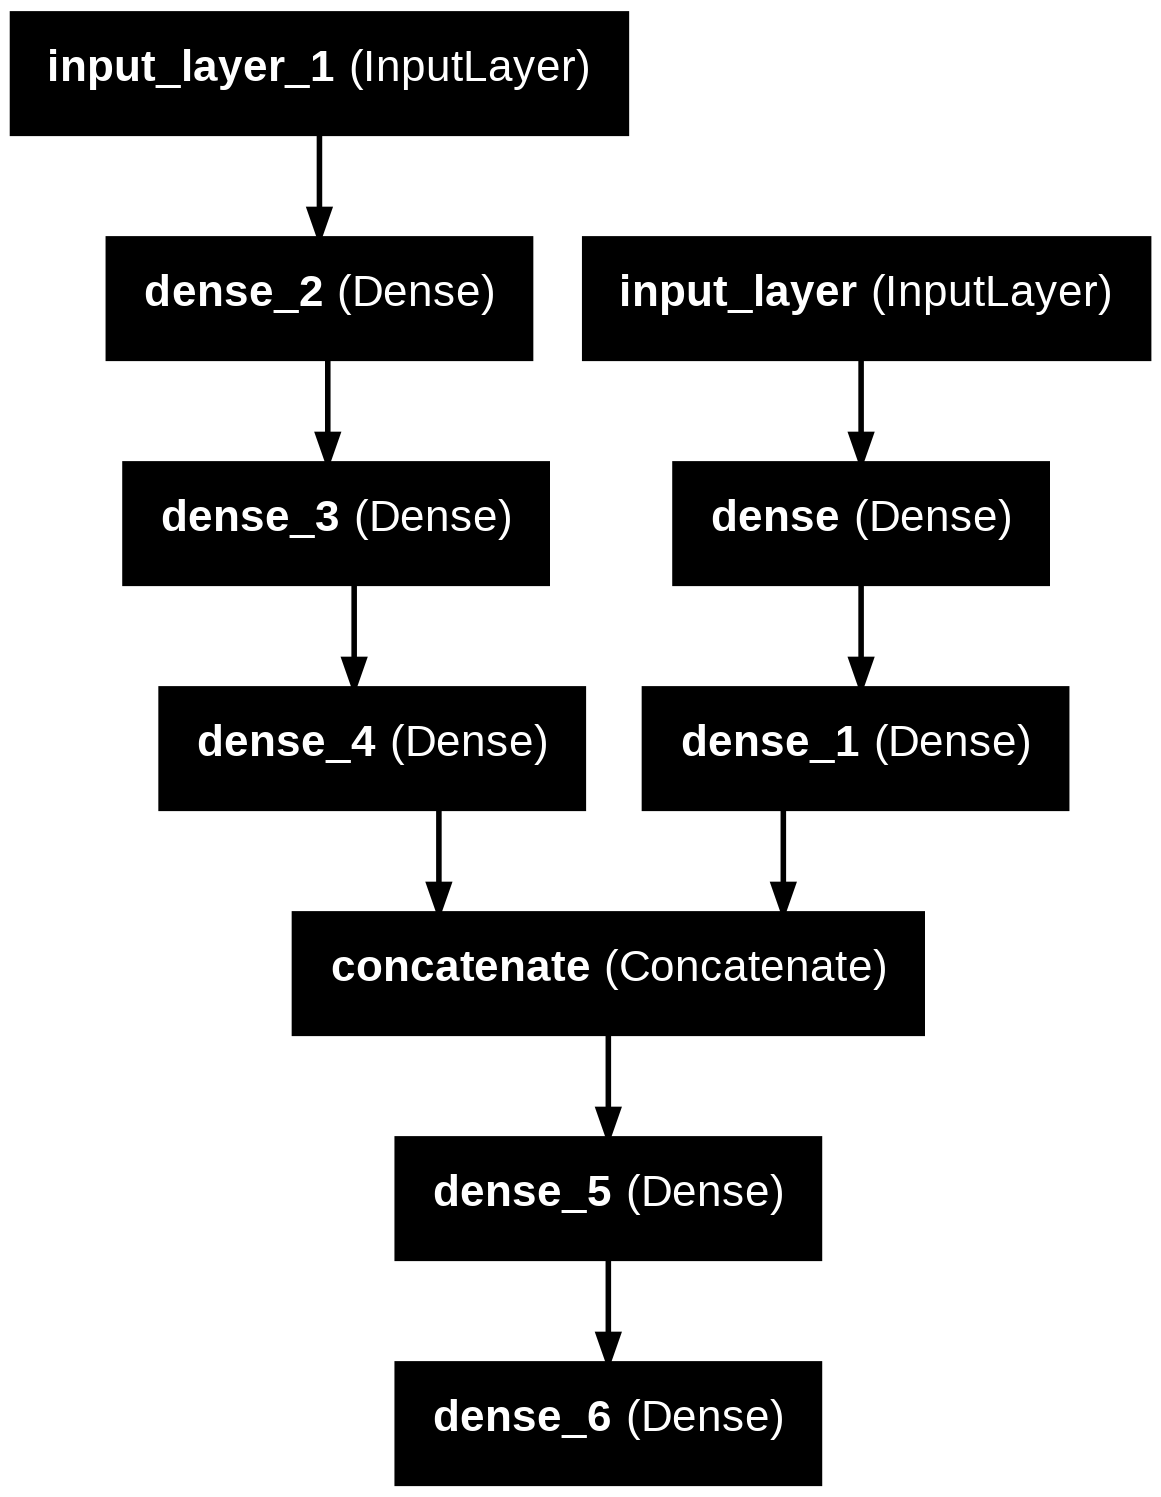

In [13]:
from keras.utils import plot_model

plot_model(model, show_layer_names=True)